In [1]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
def simpleRrsCalc(spectra, RHO=0.028):
    '''
    Takes Spectra and calcs Rrs using RHO. Needs a spectra generated by dalecLoad.uniform_grid_spectra_mean
    '''
    spectra['Rrs'] = (spectra['Lu_mean'] - (RHO * spectra['Lsky_mean'])) / spectra['Ed_mean']
    return spectra

In [3]:
tables = dalecLoad.multiLogLoad('data/21-jun-22/TESTLOG_20220622.dtf', dropNA=False)

In [4]:
tables['Log 1'] # carron valley

spectral_ind         Lat   UTC Date  Relaz  Voltage  \
Sample #  Channel                                                        
5        Ed                  21         NaN 2022-06-21    NaN     11.5   
         Ed                  22         NaN 2022-06-21    NaN     11.5   
         Ed                  23         NaN 2022-06-21    NaN     11.5   
         Ed                  24         NaN 2022-06-21    NaN     11.5   
         Ed                  25         NaN 2022-06-21    NaN     11.5   
...                         ...         ...        ...    ...      ...   
40       Lu                 216  56.0295791 2022-06-21   25.3     11.5   
         Lu                 217  56.0295791 2022-06-21   25.3     11.5   
         Lu                 218  56.0295791 2022-06-21   25.3     11.5   
         Lu                 219  56.0295791 2022-06-21   25.3     11.5   
         Lu                 220  56.0295791 2022-06-21   25.3     11.5   

                           Lon     Temp  Heading  Gearpos   Saturation Flag  \
Sample #  Channel                                                             
5        Ed                NaN   21.375    205.7      0.0                 0   
         Ed                NaN   21.375    205.7      0.0                 0   
         Ed                NaN   21.375    205.7      0.0                 0   
         Ed                NaN   21.375    205.7      0.0                 0   
         Ed                NaN   21.375    205.7      0.0                 0   
...                        ...      ...      ...      ...               ...   
40       Lu        -4.06032180  21.6875    204.9      0.0                 0   
         Lu        -4.06032180  21.6875    204.9      0.0                 0   
         Lu        -4.06032180  21.6875    204.9      0.0                 0   
         Lu        -4.06032180  21.6875    204.9      0.0                 0   
         Lu        -4.06032180  21.6875    204.9      0.0                 0   

                       UTC Time  Solar Elev  Solar Azi  Integration Time  \
Sample #  Channel                                                          
5        Ed        12:10:50.108         NaN        NaN                42   
         Ed        12:10:50.108         NaN        NaN                42   
         Ed        12:10:50.108         NaN        NaN                42   
         Ed        12:10:50.108         NaN        NaN                42   
         Ed        12:10:50.108         NaN        NaN                42   
...                         ...         ...        ...               ...   
40       Lu        12:11:59.031        57.7      179.6               256   
         Lu        12:11:59.031        57.7      179.6               256   
         Lu        12:11:59.031        57.7      179.6               256   
         Lu        12:11:59.031        57.7      179.6               256   
         Lu        12:11:59.031        57.7      179.6               256   

                   GPS_Fix  Pitch  Roll  Spectral Magnitude  
Sample #  Channel                                            
5        Ed              V    5.0   1.0            0.231670  
         Ed              V    5.0   1.0            0.237858  
         Ed              V    5.0   1.0            0.236359  
         Ed              V    5.0   1.0            0.226115  
         Ed              V    5.0   1.0            0.227510  
...                    ...    ...   ...                 ...  
40       Lu              A    5.0   0.0            0.001691  
         Lu              A    5.0   0.0            0.001588  
         Lu              A    5.0   0.0            0.001711  
         Lu              A    5.0   0.0            0.001530  
         Lu              A    5.0   0.0            0.001499  

[21600 rows x 18 columns]

In [5]:
tables['Log 2'] # loch coulter

spectral_ind  Lat   UTC Date  Relaz  Voltage  Lon     Temp  \
Sample #  Channel                                                               
6        Ed                  21  NaN 2022-06-21    NaN     11.5  NaN  20.9375   
         Ed                  22  NaN 2022-06-21    NaN     11.5  NaN  20.9375   
         Ed                  23  NaN 2022-06-21    NaN     11.5  NaN  20.9375   
         Ed                  24  NaN 2022-06-21    NaN     11.5  NaN  20.9375   
         Ed                  25  NaN 2022-06-21    NaN     11.5  NaN  20.9375   
...                         ...  ...        ...    ...      ...  ...      ...   
24       Lu                 216  NaN 2022-06-21    NaN     11.5  NaN   21.125   
         Lu                 217  NaN 2022-06-21    NaN     11.5  NaN   21.125   
         Lu                 218  NaN 2022-06-21    NaN     11.5  NaN   21.125   
         Lu                 219  NaN 2022-06-21    NaN     11.5  NaN   21.125   
         Lu                 220  NaN 2022-06-21    NaN     11.5  NaN   21.125   

                   Heading  Gearpos   Saturation Flag      UTC Time  \
Sample #  Channel                                                     
6        Ed          236.9      0.0                 0  10:55:22.042   
         Ed          236.9      0.0                 0  10:55:22.042   
         Ed          236.9      0.0                 0  10:55:22.042   
         Ed          236.9      0.0                 0  10:55:22.042   
         Ed          236.9      0.0                 0  10:55:22.042   
...                    ...      ...               ...           ...   
24       Lu          229.9     -0.1                 0  10:55:57.932   
         Lu          229.9     -0.1                 0  10:55:57.932   
         Lu          229.9     -0.1                 0  10:55:57.932   
         Lu          229.9     -0.1                 0  10:55:57.932   
         Lu          229.9     -0.1                 0  10:55:57.932   

                   Solar Elev  Solar Azi  Integration Time  GPS_Fix  Pitch  \
Sample #  Channel                                                            
6        Ed               NaN        NaN                32        V    0.0   
         Ed               NaN        NaN                32        V    0.0   
         Ed               NaN        NaN                32        V    0.0   
         Ed               NaN        NaN                32        V    0.0   
         Ed               NaN        NaN                32        V    0.0   
...                       ...        ...               ...      ...    ...   
24       Lu               NaN        NaN               190        V   -1.0   
         Lu               NaN        NaN               190        V   -1.0   
         Lu               NaN        NaN               190        V   -1.0   
         Lu               NaN        NaN               190        V   -1.0   
         Lu               NaN        NaN               190        V   -1.0   

                   Roll  Spectral Magnitude  
Sample #  Channel                            
6        Ed         0.0            0.362570  
         Ed         0.0            0.371936  
         Ed         0.0            0.368973  
         Ed         0.0            0.354144  
         Ed         0.0            0.355251  
...                 ...                 ...  
24       Lu         2.0            0.002360  
         Lu         2.0            0.002452  
         Lu         2.0            0.002208  
         Lu         2.0            0.002087  
         Lu         2.0            0.002102  

[11400 rows x 18 columns]

In [6]:
tables['Log 3'] # north third

spectral_ind         Lat   UTC Date  Relaz  Voltage  \
Sample #  Channel                                                        
5        Ed                  21         NaN 2022-06-21    NaN     11.5   
         Ed                  22         NaN 2022-06-21    NaN     11.5   
         Ed                  23         NaN 2022-06-21    NaN     11.5   
         Ed                  24         NaN 2022-06-21    NaN     11.5   
         Ed                  25         NaN 2022-06-21    NaN     11.5   
...                         ...         ...        ...    ...      ...   
40       Lu                 216  56.0803718 2022-06-21   85.8     11.5   
         Lu                 217  56.0803718 2022-06-21   85.8     11.5   
         Lu                 218  56.0803718 2022-06-21   85.8     11.5   
         Lu                 219  56.0803718 2022-06-21   85.8     11.5   
         Lu                 220  56.0803718 2022-06-21   85.8     11.5   

                           Lon     Temp  Heading  Gearpos   Saturation Flag  \
Sample #  Channel                                                             
5        Ed                NaN    21.75    207.2     -0.3                 0   
         Ed                NaN    21.75    207.2     -0.3                 0   
         Ed                NaN    21.75    207.2     -0.3                 0   
         Ed                NaN    21.75    207.2     -0.3                 0   
         Ed                NaN    21.75    207.2     -0.3                 0   
...                        ...      ...      ...      ...               ...   
40       Lu        -3.99969673  22.0625    206.6     -0.3                 0   
         Lu        -3.99969673  22.0625    206.6     -0.3                 0   
         Lu        -3.99969673  22.0625    206.6     -0.3                 0   
         Lu        -3.99969673  22.0625    206.6     -0.3                 0   
         Lu        -3.99969673  22.0625    206.6     -0.3                 0   

                       UTC Time  Solar Elev  Solar Azi  Integration Time  \
Sample #  Channel                                                          
5        Ed        09:29:57.115         NaN        NaN                58   
         Ed        09:29:57.115         NaN        NaN                58   
         Ed        09:29:57.115         NaN        NaN                58   
         Ed        09:29:57.115         NaN        NaN                58   
         Ed        09:29:57.115         NaN        NaN                58   
...                         ...         ...        ...               ...   
40       Lu        09:31:09.034        46.3      120.8               256   
         Lu        09:31:09.034        46.3      120.8               256   
         Lu        09:31:09.034        46.3      120.8               256   
         Lu        09:31:09.034        46.3      120.8               256   
         Lu        09:31:09.034        46.3      120.8               256   

                   GPS_Fix  Pitch  Roll  Spectral Magnitude  
Sample #  Channel                                            
5        Ed              V   -3.0   1.0            0.202928  
         Ed              V   -3.0   1.0            0.206998  
         Ed              V   -3.0   1.0            0.204715  
         Ed              V   -3.0   1.0            0.195381  
         Ed              V   -3.0   1.0            0.195843  
...                    ...    ...   ...                 ...  
40       Lu              A    0.0   0.0            0.001686  
         Lu              A    0.0   0.0            0.001616  
         Lu              A    0.0   0.0            0.001545  
         Lu              A    0.0   0.0            0.001487  
         Lu              A    0.0   0.0            0.001535  

[21600 rows x 18 columns]

In [ ]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/21-jun-22/TESTLOG_20220622.dtf')
north_third = dalecLoad.uniform_grid_spectra_mean(tables['Log 3'], spect_wavelengths)
coulter = dalecLoad.uniform_grid_spectra_mean(tables['Log 2'], spect_wavelengths)
carron = dalecLoad.uniform_grid_spectra_mean(tables['Log 1'], spect_wavelengths)


In [ ]:
north_third_sample = dalecLoad.uniform_grid_spectra_mean(tables['Log 3'].loc[5, :],
                                                         spect_wavelengths)

north_third_sample = simpleRrsCalc(north_third_sample)
north_third_sample

plt.plot(north_third_sample['Wavelength'], north_third_sample['Rrs'], label='north third')


In [ ]:
# very simple Rrs calculation
RHO = 0.028

north_third['Rrs'] = (north_third['Lu_mean'] - (RHO * north_third['Lsky_mean'])) / north_third['Ed_mean']
coulter['Rrs'] = (coulter['Lu_mean'] - (RHO * coulter['Lsky_mean'])) / coulter['Ed_mean']
carron['Rrs'] = (carron['Lu_mean'] - (RHO * carron['Lsky_mean'])) / carron['Ed_mean']


fig, ax = plt.subplots(1, 3, figsize=(15,7))
ax[0].plot(north_third['Wavelength'], north_third['Rrs'], label='north third')
ax[1].plot(coulter['Wavelength'], coulter['Rrs'], label='loch coulter')
ax[2].plot(carron['Wavelength'], carron['Rrs'], label='carron valley')
ax[0].legend()
ax[1].legend()
ax[2].legend()


plt.show()

In [ ]:
north_third['abs'] = 1/north_third['Rrs']
plt.plot(north_third['Wavelength'], north_third['abs'])

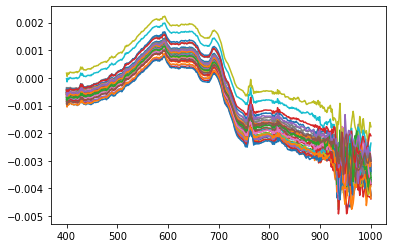

In [22]:
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/21-jun-22/TESTLOG_20220622.dtf')

for sample in tables['Log 3'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 3'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], (spectra['Rrs']))

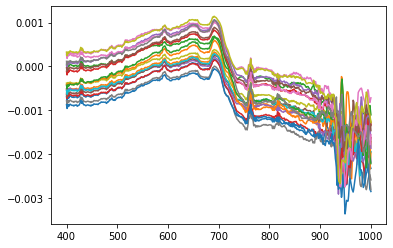

In [10]:
for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 2'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], spectra['Rrs'])

(400.0, 850.0)

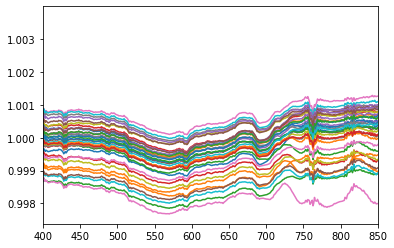

In [21]:
for sample in tables['Log 1'].index.get_level_values('Sample #').unique():
    spectra = dalecLoad.uniform_grid_spectra_Rrs(tables['Log 1'].loc[sample],
                                       spect_wavelengths)
    plt.plot(spectra['Wavelength'], 1/(1 + spectra['Rrs']))
    
plt.xlim(400, 850)